In [2]:
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class KeemPlot:
    def __init__(self, path, max_value=85.0, threshold=2, final_len=1000):
        self._max_value = max_value
        self._final_len = final_len
        self._threshold = threshold / max_value
        self.Raw_Arrays = self._gen_raw_arrays(path)
        self.flatdata, self.flatdata_ut, self.barcodes = self._get_codes(self.Raw_Arrays)

    def _gen_raw_arrays(self, path):
        image_names = [i for i in os.listdir(path) if not i.startswith(".")]
        Raw_Images = []
        for i, name in enumerate(image_names):
            Raw_Images.append(io.imread(path+name)[0,:,:])

        return Raw_Images
    
    def _interp1d(self, array, new_len):
        la = len(array)
        return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)
    
    def _get_codes(self, Raw_data):

        flatdata = []
        flatdata_ut = []
        barcodes = []

        for i, image in enumerate(Raw_data):
            arr = image.max(axis=0)                       # Collapse 2d image into vector based on max value in each column
            arr = arr/self._max_value                     # Normalize to values between 0 and 1.
            arr_int = self._interp1d(arr, self._final_len)          # Interpolate the vector into 10000 values.
            flatdata_ut.append(np.copy(arr_int))          # Append unthresholded arrays
            arr_int[arr_int < self._threshold] = 0        # Threshold out noise/unwanted dim signal.
            flatdata.append(np.copy(arr_int))
            height = self._final_len // 20 if self._final_len >= 20 else 1
            barcodes.append(np.vstack([arr_int for k in range(height)]))
            
        return flatdata, flatdata_ut, barcodes
    
    def plot_barcodes(self, barcodes, save=None):

        fig, axes = plt.subplots(len(barcodes), 1)


        for i, bar in enumerate(barcodes):
            axes[i].imshow(bar, cmap="Greys_r", vmin = 0, vmax=1.0)
            axes[i].axis("off")

        fig.tight_layout(pad=0)
        
        
        if save is not None:
            fig.savefig(save, dpi=1200)


In [5]:
dir1 = KeemPlot("/Volumes/BIG_DATA/04_DATA/04_LIVE_BACTERIAL_IMAGING_ANALYSIS/bactoquant/JUB66_IN_CEMBIO/", max_value=85.0, threshold=2, final_len=10000)

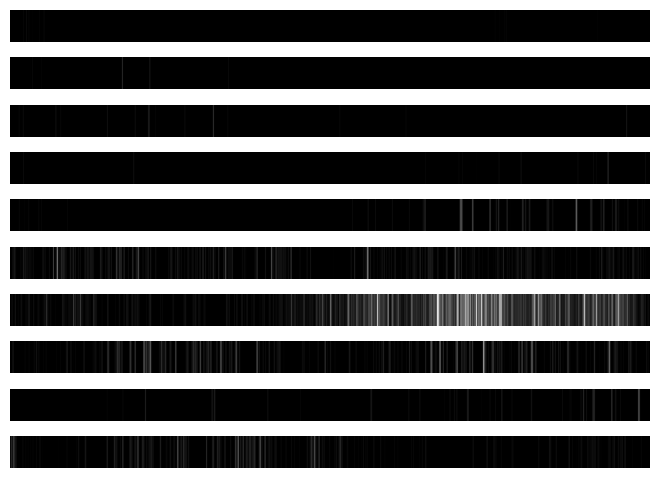

In [6]:
dir1.plot_barcodes(dir1.barcodes)

In [7]:
db = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/IMAGING_DATABASE/tentative_structure")

In [8]:
db2 = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/IMAGING_DATABASE/Jess_Data")

In [9]:
db2["scope"] = ["DV" for i in range(db2.shape[0])]

In [10]:
write = []
for i in range(10):
    write.append(["230510", "JUB66_IN_CEMBIO", dir1.flatdata_ut[i], dir1.flatdata[i], "CON"])

In [11]:
df1 = pd.DataFrame(write)

In [19]:
df1.columns = db2.columns

In [20]:
df1

,date,strain,unthresholded,thresholded,scope
0,230510,JUB66_IN_CEMBIO,"[0.0117647061124444, 0.0117647061124444, 0.011...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
1,230510,JUB66_IN_CEMBIO,"[0.009598208591341972, 0.01035850860149783, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
2,230510,JUB66_IN_CEMBIO,"[0.008359771221876144, 0.009009953399728758, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
3,230510,JUB66_IN_CEMBIO,"[0.009807826951146126, 0.010144840697455656, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
4,230510,JUB66_IN_CEMBIO,"[0.01173518504947424, 0.011743773585545866, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
5,230510,JUB66_IN_CEMBIO,"[0.0117647061124444, 0.0117647061124444, 0.011...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
6,230510,JUB66_IN_CEMBIO,"[0.008065234869718552, 0.008678326148702594, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
7,230510,JUB66_IN_CEMBIO,"[0.011698340997099876, 0.011720675091822782, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
8,230510,JUB66_IN_CEMBIO,"[0.010382987558841705, 0.010360706437642525, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",CON
9,230510,JUB66_IN_CEMBIO,"[0.011930234730243683, 0.014520831957700873, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.025865748803531697...",CON


In [22]:
db_f = pd.concat([db2,df1])

In [25]:
db_f

,date,strain,unthresholded,thresholded,scope
0,230415,MK_JUB66_RFP,"[0.03125763125763126, 0.031401601698631404, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
1,230415,MK_JUB66_RFP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
2,230415,MK_JUB66_RFP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
3,230415,MK_JUB66_RFP,"[0.03296703296703297, 0.03324207878663324, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
4,230415,MK_JUB66_RFP,"[0.03247863247863248, 0.03247863247863248, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
5,230415,MK_JUB66_RFP,"[0.03028083028083028, 0.030974672558830973, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
6,230228,JUB66_RFP,"[0.043467643467643466, 0.04296576177764297, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
7,230228,JUB66_RFP,"[0.03833943833943834, 0.03865705251843866, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
8,230228,JUB66_RFP,"[0.041758241758241756, 0.04138848561290805, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV
9,230228,JUB66_RFP,"[0.05811965811965812, 0.05811965811965812, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",DV


In [26]:
pd.to_pickle(db_f, "/Volumes/onishlab_shared/PROJECTS/30_Andrew/IMAGING_DATABASE/DeltaVision_DB")

In [31]:
ut = db_f["unthresholded"].values

In [33]:
barcodes = []

for arr in ut:
    barcodes.append(np.vstack([arr for k in range(500)]))

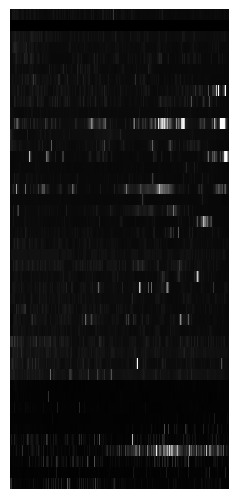

In [35]:
dir1.plot_barcodes(barcodes, "./all_da_codes.png")